# Train OCR text Detector quick example

In [1]:
import os
import sys
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../../../')
sys.path.append(NOMEROFF_NET_DIR)

from nomeroff_net.text_detectors.base.ocr import OCR

In [2]:
plt.rcParams["figure.figsize"] = (10, 10)

In [3]:
%matplotlib inline 

In [4]:
# auto download latest dataset
from nomeroff_net.tools import modelhub

# auto download latest dataset
info = modelhub.download_dataset_for_model("Kg")
PATH_TO_DATASET = info["dataset_path"]

# local path dataset
#PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "./data/dataset/OptionsDetector/numberplate_options_example")

In [5]:
PATH_TO_DATASET

'/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/Kg/autoriaNumberplateOcrKg-2020-12-31'

In [6]:
DATASET_NAME = "kg"
VERSION = "2021_08_30_pytorch_lightning"

RESULT_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, 
                                 "models/", 
                                 'anpr_ocr_{}_{}.ckpt'.format(DATASET_NAME, VERSION))

In [7]:
RESULT_MODEL_PATH

'/var/www/nomeroff-net24/models/anpr_ocr_kg_2021_08_30_pytorch_lightning.ckpt'

In [8]:
class kg(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9",
                        "A", "B", "C", "D", "E", "F", "G", "H", "I", "J",
                        "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T",
                        "U", "V", "W", "X", "Y", "Z"]

        # Train hyperparameters
        self.batch_size = 64
        self.epochs = 50
        self.gpus = 1

In [9]:
ocrTextDetector = kg()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=False, num_workers=24)

GET ALPHABET
Max plate length in "val": 8
Max plate length in "train": 8
Max plate length in "test": 8
Letters train  {'D', 'P', '6', '4', 'V', 'M', 'K', 'C', 'R', '3', '7', 'Y', 'N', '0', '9', 'X', 'O', 'J', 'A', 'B', 'W', '8', '2', 'E', 'T', 'S', 'H', 'U', '5', 'Z', 'G', 'Q', '1', 'I', 'L', 'F'}
Letters val  {'L', 'D', 'P', '6', '4', 'V', 'K', 'C', 'R', '3', '7', 'Y', 'N', '0', '9', 'X', 'O', 'J', 'A', 'B', 'W', '8', '2', 'E', 'T', 'S', 'H', 'U', '5', 'Z', 'G', 'Q', '1', 'I', 'M', 'F'}
Letters test  {'L', 'D', 'P', '6', '4', 'V', 'K', 'C', 'R', '3', '7', 'Y', 'N', '0', '9', 'X', 'O', 'J', 'A', 'B', 'W', '8', '2', 'E', 'T', 'S', 'H', 'U', '5', 'Z', 'G', 'Q', '1', 'I', 'M', 'F'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

EXPLAIN DATA TRANSFORMATIONS
START BUILD DATA
DATA PREPARED


In [10]:
#ocrTextDetector.load(RESULT_MODEL_PATH)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 2.4 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.229    Total estimated model params size (MB)


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt


Found lr: 0.12589254117941648



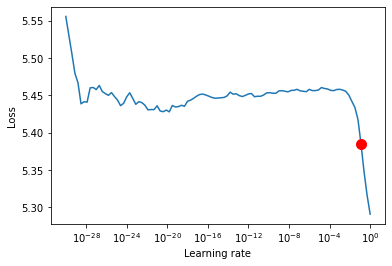

In [10]:
# tune
lr_finder = ocrTextDetector.tune()

# Plot with
fig = lr_finder.plot(suggest=True)
fig.show()

In [11]:
ocrTextDetector.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch    20: reducing learning rate of group 0 to 2.0000e-03.


Epoch    26: reducing learning rate of group 0 to 2.0000e-04.


Epoch    32: reducing learning rate of group 0 to 2.0000e-05.


Epoch    38: reducing learning rate of group 0 to 2.0000e-06.


Epoch    44: reducing learning rate of group 0 to 2.0000e-07.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch    50: reducing learning rate of group 0 to 2.0000e-08.

[INFO] best model path /var/www/nomeroff-net24/nomeroff_net/data/logs/ocr/epoch=13-step=6397.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.04435639828443527}
--------------------------------------------------------------------------------


NPOcrNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [12]:
ocrTextDetector.save(RESULT_MODEL_PATH)

model save to /var/www/nomeroff-net24/models/anpr_ocr_kg_2021_08_30_pytorch_lightning.ckpt


In [12]:
ocrTextDetector.load(RESULT_MODEL_PATH)

NPOcrNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [13]:
ocrTextDetector.test_acc(verbose=True)


[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/Kg/autoriaNumberplateOcrKg-2020-12-31/test/img/kg183_2_0.png
Predicted: s4055ab 			 True: s4095ab

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/Kg/autoriaNumberplateOcrKg-2020-12-31/test/img/10971326_0_2.png
Predicted: 0694aar 			 True: 06943aar

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/Kg/autoriaNumberplateOcrKg-2020-12-31/test/img/kg4632_0_2.png
Predicted: b5648ah 			 True: b5648ai

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/Kg/autoriaNumberplateOcrKg-2020-12-31/test/img/kg1541_0_2.png
Predicted: b0008r 			 True: s0008r

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/Kg/autoriaNumberplateOcrKg-2020-12-31/test/img/15759009_2_2.png
Predicted: 08810abk 			 True: 08810ack

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/Text

0.9756554307116105

In [ ]:
#ocrTextDetector.val_acc(verbose=False)
#ocrTextDetector.train_acc(verbose=False)

## than train with augumentation

In [9]:
class kg(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9",
                        "A", "B", "C", "D", "E", "F", "G", "H", "I", "J",
                        "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T",
                        "U", "V", "W", "X", "Y", "Z"]
        
        # Train hyperparameters
        self.batch_size = 64
        self.epochs = 35
        self.gpus = 1

In [10]:
ocrTextDetector = kg()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=True, num_workers=24)

GET ALPHABET
Max plate length in "val": 8
Max plate length in "train": 8
Max plate length in "test": 8
Letters train  {'V', '3', 'P', 'N', 'C', 'B', 'J', 'U', 'L', 'X', 'I', 'G', 'S', 'R', '9', '4', '8', 'O', '7', 'F', 'M', '2', '5', 'W', '6', '1', 'H', 'D', 'Z', 'E', 'A', 'Q', 'Y', '0', 'K', 'T'}
Letters val  {'V', '3', 'P', 'N', 'C', 'B', 'K', 'J', 'X', 'U', 'I', 'G', 'S', 'R', '9', 'O', '8', '4', '7', 'F', 'M', '2', '5', 'W', '6', '1', 'H', 'D', 'Z', 'E', 'A', 'Q', 'Y', '0', 'L', 'T'}
Letters test  {'V', 'P', '3', 'N', 'C', 'B', 'J', 'U', 'X', 'L', 'I', 'G', 'S', 'R', '9', '8', '4', 'O', '7', 'F', 'M', '2', '5', 'W', '6', '1', 'H', 'D', 'Z', 'E', 'A', 'Q', 'Y', '0', 'K', 'T'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

EXPLAIN DATA TRANSFORMATIONS
START BUILD DATA
DATA PREPARED


In [11]:
#ocrTextDetector.load(RESULT_MODEL_PATH)
ocrTextDetector.load('/var/www/nomeroff-net24/models/anpr_ocr_am_2021_08_30_pytorch_lightning.ckpt.0')

NPOcrNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 2.4 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.229    Total estimated model params size (MB)


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Global seed set to 1


Found lr: 0.5011872336272719



GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Global seed set to 1


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/nomeroff_net/data/logs/ocr/epoch=34-step=15994.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.027372006326913834}
--------------------------------------------------------------------------------

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/Kg/autoriaNumberplateOcrKg-2020-12-31/test/img/13320395_0_2.png
Predicted: 01561ach 			 True: 01561acm

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/Kg/autoriaNumberplateOcrKg-2020-12-31/test/img/12052880_1_2.png
Predicted: 0713ax 			 True: 07123max

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/Kg/autoriaNumberplateOcrKg-2020-12-31/test/img/15613062_0_2.png
Predicted: s8674ak 			 True: s3674ak

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/Kg/autoriaNumberplateOcrKg-2020-12-31/test/img/kg4632_0_2.png
Predicted: b5648ah 			 True: b5648ai

[INFO] /var/www/nomeroff-net24

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 2.4 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.229    Total estimated model params size (MB)


Testing Accuracy:  0.9634831460674157
model save to /var/www/nomeroff-net24/models/anpr_ocr_kg_2021_08_30_pytorch_lightning.ckpt.1


Global seed set to 1


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Global seed set to 2
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found lr: 0.5011872336272719


Global seed set to 2


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/nomeroff_net/data/logs/ocr/epoch=32-step=15080.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.023848090320825577}
--------------------------------------------------------------------------------

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/Kg/autoriaNumberplateOcrKg-2020-12-31/test/img/12052880_1_2.png
Predicted: 07123nax 			 True: 07123max

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/Kg/autoriaNumberplateOcrKg-2020-12-31/test/img/kg183_2_0.png
Predicted: s4055ab 			 True: s4095ab

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/Kg/autoriaNumberplateOcrKg-2020-12-31/test/img/11857891_0_2.png
Predicted: b77567aw 			 True: b7767aw

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/Kg/autoriaNumberplateOcrKg-2020-12-31/test/img/kg4632_0_2.png
Predicted: b5648au 			 True: b5648ai

[INFO] /var/www/nomeroff-net24/n

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing Accuracy:  0.9662921348314607
model save to /var/www/nomeroff-net24/models/anpr_ocr_kg_2021_08_30_pytorch_lightning.ckpt.2



  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 2.4 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.229    Total estimated model params size (MB)
Global seed set to 2


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Global seed set to 3
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found lr: 0.5011872336272719



Global seed set to 3


[INFO] best model path 


MisconfigurationException: `.test(ckpt_path="best")` is set but `ModelCheckpoint` is not configured to save the best model.

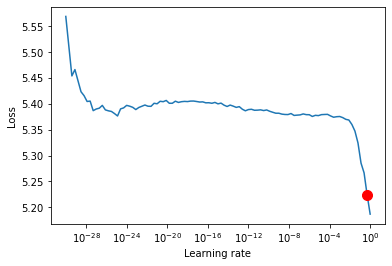

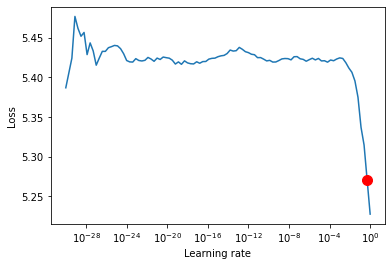

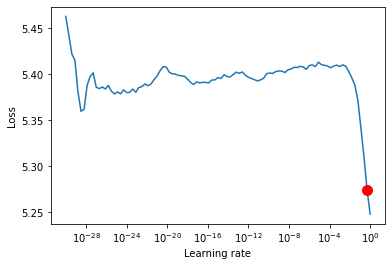

In [12]:
for i in range(1,8):
    # tune
    lr_finder = ocrTextDetector.tune()

    # Plot with
    fig = lr_finder.plot(suggest=True)
    fig.show()
    model = ocrTextDetector.train(seed=i)
    ocrTextDetector.test_acc(verbose=True)
    ocrTextDetector.save('{}.{}'.format(RESULT_MODEL_PATH,i))